<p style = "font-family:Times New Roman;font-size:200%;text-align:left;color:white;">Importing Libraries<p>


In [17]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle

<p style = "font-family:Times New Roman;font-size:200%;text-align:left;color:white;">KPIs Preperation<p>


<p style = "font-family:Times New Roman;font-size:200%;text-align:left;color:white;">What KPIs should be collected ?<br><br> * Total No. of followers ?<br> * Total No. of posts ? <br> * Total NO. of impressions <br> * Total No. of likes ?<br> * Average of engagement rate ? <br> * Total Reach ? <p>


In [18]:
df = pd.read_csv( 'Data/Feature Engineered Data/Feature Engineered Data.csv' )

In [19]:
df

,post_id,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,traffic_source,engagement_rate,content_category,UPLOAD_DATE,Year,Month,Day,Hour,Day Name
0,IG0000001,Reel,31627,7559,4530,6393,615036,1007750,1340,3,899,Home Feed,4.97,Technology,2024-11-30,2024,11,30,9,Saturday
1,IG0000002,Photo,63206,3490,1680,6809,1237071,1345900,1351,20,805,Hashtags,5.59,Fitness,2025-08-15,2025,8,15,9,Friday
2,IG0000003,Reel,94373,3727,1761,8367,1127470,1305369,242,24,758,Reels Feed,8.29,Beauty,2025-09-11,2025,9,11,9,Thursday
3,IG0000004,Reel,172053,7222,2875,9290,764030,897874,446,11,402,External,21.32,Music,2025-09-18,2025,9,18,9,Thursday
4,IG0000005,Video,99646,2703,4444,9746,7004,495406,1905,8,155,Profile,23.52,Technology,2025-03-21,2025,3,21,9,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,IG0029995,Video,46046,8354,3847,11095,597992,820688,1254,18,124,Reels Feed,8.45,Travel,2024-12-18,2024,12,18,9,Wednesday
29995,IG0029996,Carousel,67711,3266,458,12380,1908094,2218288,1427,4,310,Hashtags,3.78,Beauty,2025-05-05,2025,5,5,9,Monday
29996,IG0029997,Photo,52326,7328,3687,7619,1984066,2447893,713,4,223,Explore,2.90,Photography,2025-05-26,2025,5,26,9,Monday
29997,IG0029998,Carousel,158113,5890,2573,6329,1984709,2001092,1341,22,978,Explore,8.64,Technology,2025-08-02,2025,8,2,9,Saturday


In [20]:
def human_readable(n):
    if n >= 1_000_000_000:
        return f"{n/1_000_000_000:.0f}Bn"
    elif n >= 1_000_000:
        return f"{n/1_000_000:.0f}Mn"
    elif n >= 1_000:
        return f"{n/1_000:.0f}K"
    else:
        return str(n)

In [21]:
KPIs_dict = {
    'Total Followers' : human_readable( int( df['followers_gained'].sum(  ) ) ),
    'Total Posts' : human_readable( len( df ) ),
    'Total Likes' : human_readable( int( df['likes'].sum() ) ),
    'Total Impressions' : human_readable( int( df['impressions'].sum() ) ),
    'Average of engagement rate' : human_readable( int( df['engagement_rate'].mean() ) ),
    'Total Reach' : human_readable( int( df['reach'].sum() ) ),
    
}

In [22]:
KPIs_dict

{'Total Followers': '15Mn',
 'Total Posts': '30K',
 'Total Likes': '3Bn',
 'Total Impressions': '37Bn',
 'Average of engagement rate': '14',
 'Total Reach': '30Bn'}

<p style = "font-family:Times New Roman;font-size:200%;text-align:left;color:white;">Data Visualization<p>


In [23]:
df.columns

Index(['post_id', 'media_type', 'likes', 'comments', 'shares', 'saves',
       'reach', 'impressions', 'caption_length', 'hashtags_count',
       'followers_gained', 'traffic_source', 'engagement_rate',
       'content_category', 'UPLOAD_DATE', 'Year', 'Month', 'Day', 'Hour',
       'Day Name'],
      dtype='object')

<p style = "font-family:Times New Roman;font-size:200%;text-align:left;color:white;">What Content do achieve the highest reach ? <p>


In [24]:
reach_by_content_category_df = df.groupby( 'content_category' )['reach'].sum().\
    sort_values( ascending=True ).to_frame().reset_index()
reach_by_content_category_df    

,content_category,reach
0,Travel,2932483597
1,Beauty,2945810876
2,Lifestyle,2949434508
3,Music,2971517003
4,Food,2993847359
5,Photography,3000287878
6,Technology,3009743033
7,Fashion,3021862310
8,Fitness,3027323244
9,Comedy,3043541689


In [25]:
instagram_palette = [
    "#1F6AE1",  # Blue
    "#3A5BDC",  # Blue-Purple
    "#5A4FD6",  # Indigo
    "#7A3FCB",  # Purple
    "#9B3CB4",  # Violet
    "#C13584",  # Magenta
    "#E1306C",  # Pink
    "#F56040",  # Orange
    "#FCAF45",  # Light Orange
    "#FFD166"   # Yellow
]

In [26]:
df['content_category'].nunique()

10

In [27]:
px.histogram( reach_by_content_category_df, x = 'reach', y = 'content_category', color = 'content_category',
             color_discrete_sequence= instagram_palette, template= 'simple_white', width = 600
             )

In [28]:
px.colors.sequential.Sunset


['rgb(243, 231, 155)',
 'rgb(250, 196, 132)',
 'rgb(248, 160, 126)',
 'rgb(235, 127, 134)',
 'rgb(206, 102, 147)',
 'rgb(160, 89, 160)',
 'rgb(92, 83, 165)']

In [29]:
os.listdir()

['.git',
 'app',
 'Artifacts',
 'Data',
 'EDA & Feature Engineering.ipynb',
 'Insta-logo.jpg',
 'Visualization.ipynb']

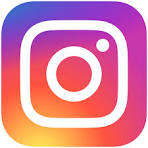

In [32]:
from PIL import Image
insta_img = Image.open( 'Insta-logo.jpg' )
insta_img